
Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn

.....Import Dataset....

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


.....Show data....

In [ ]:
df = pd.read_csv("cardio_train.csv")
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


..........Data Describe........

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19339.127029,1.349571,164.359229,74.213113,126.994986,82.533343,1.366871,1.226457,0.088129,0.053771,0.499700
std,2884.326007,0.476838,8.210126,14.507539,25.141635,67.749460,0.680250,0.572270,0.283484,0.225568,0.500003
min,180.000000,1.000000,55.000000,10.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,17599.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,19693.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,21322.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,23713.000000,2.000000,250.000000,550.000000,2000.000000,9100.000000,3.000000,3.000000,1.000000,1.000000,1.000000


........Data Visualization.....

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


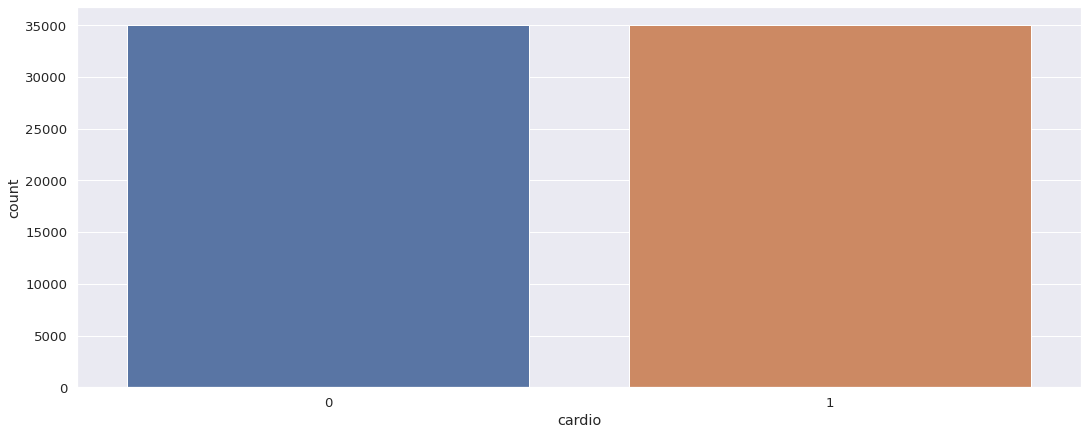

In [ ]:
fig = splt.gcf()
fig.set_size_inches(18, 7)
seaborn.set(font_scale=1.2)
seaborn.countplot(df['cardio'])

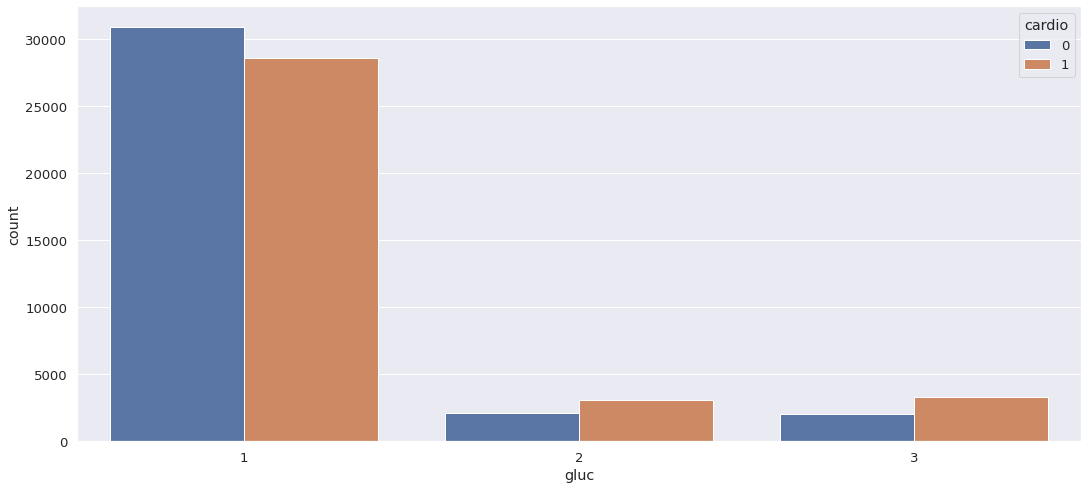

In [ ]:
fig = splt.gcf()
fig.set_size_inches(18, 8)
seaborn.set(font_scale=1.2)
seaborn.countplot(x='gluc',hue='cardio',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


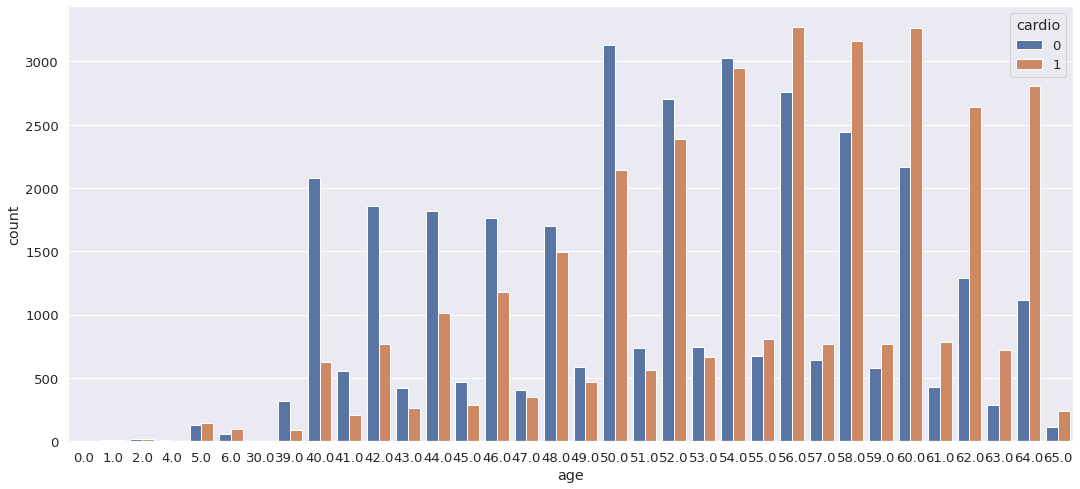

In [ ]:
fig = splt.gcf()
fig.set_size_inches(18, 8)
seaborn.set(font_scale=1.2)
seaborn.countplot((df['age']/365).round(0),hue='cardio',data=df)

Split our dataset into its attributes and labels

In [ ]:
x = df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
0,18393,2,168,62.0,110,80,1,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0
69997,19066,2,183,105.0,180,90,3,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0


In [ ]:
y = df.iloc[:,10]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training and Predictions

Applying Randomforest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: ignored

Applying KNeighborsClassifier Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8253 2305]
 [3788 6654]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10558
           1       0.74      0.64      0.69     10442

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



......DecisionTreeClassifier.....

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

.....Accuracy....

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8253 2305]
 [3788 6654]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10558
           1       0.74      0.64      0.69     10442

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

